Meke New Data sheet

In [9]:
import os
import pyspark
import pyspark.sql as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions as pyspark_functions
from pyspark import SparkContext, SparkConf
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import pandas as pd
from pyspark.sql.functions import col, sum


In [10]:
import csv
from datetime import datetime

# Define column names
columns = ['HCHO Reading', 'Location', 'Current Date', 'Next Date']

# Define filename
filename = 'Data_set_for_data_process.csv'

# Write column names to CSV file
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(columns)

Adding Data into the New dataset

In [11]:

# Load  dataset
A = pd.read_csv('D:\DESKTOP\DE CW\col_mat_nuw_output.csv')
B = pd.read_csv('D:\DESKTOP\DE CW\kan_output.csv')
C = pd.read_csv('D:\DESKTOP\DE CW\mon_kur_jaf_output.csv')

# Print column names
print(A.columns)
print(B.columns)
print(C.columns)

Index(['0.00019698343957810148', 'Colombo Proper', '2019-01-01', '2019-01-02'], dtype='object')
Index(['0.00017607134598773356', 'Kandy Proper', '2019-01-01', '2019-01-02'], dtype='object')
Index(['Unnamed: 0', 'Bibile, Monaragala', '2019-01-01', '2019-01-02'], dtype='object')


In [12]:

# Load datasets
A = pd.read_csv(r"D:\DESKTOP\DE CW\col_mat_nuw_output.csv")
B = pd.read_csv(r"D:\DESKTOP\DE CW\kan_output.csv")
C = pd.read_csv(r"D:\DESKTOP\DE CW\mon_kur_jaf_output.csv")

# Rename columns
A.columns = ['HCHO Reading', 'Location', 'Current Date', 'Next Date']
B.columns = ['HCHO Reading', 'Location', 'Current Date', 'Next Date']
C.columns = ['HCHO Reading', 'Location', 'Current Date', 'Next Date']

# Concatenate datasets
merged_df = pd.concat([A, B, C], ignore_index=True)

# Save merged dataset
merged_df.to_csv("Data_set_for_data_process.csv", index=False)

Location Counts:
Location
Deniyaya, Matara       1826
Nuwara Eliya Proper    1826
Kurunegala Proper      1826
Jaffna Proper          1826
Colombo Proper         1825
Kandy Proper           1825
Bibile, Monaragala     1825
Name: count, dtype: int64



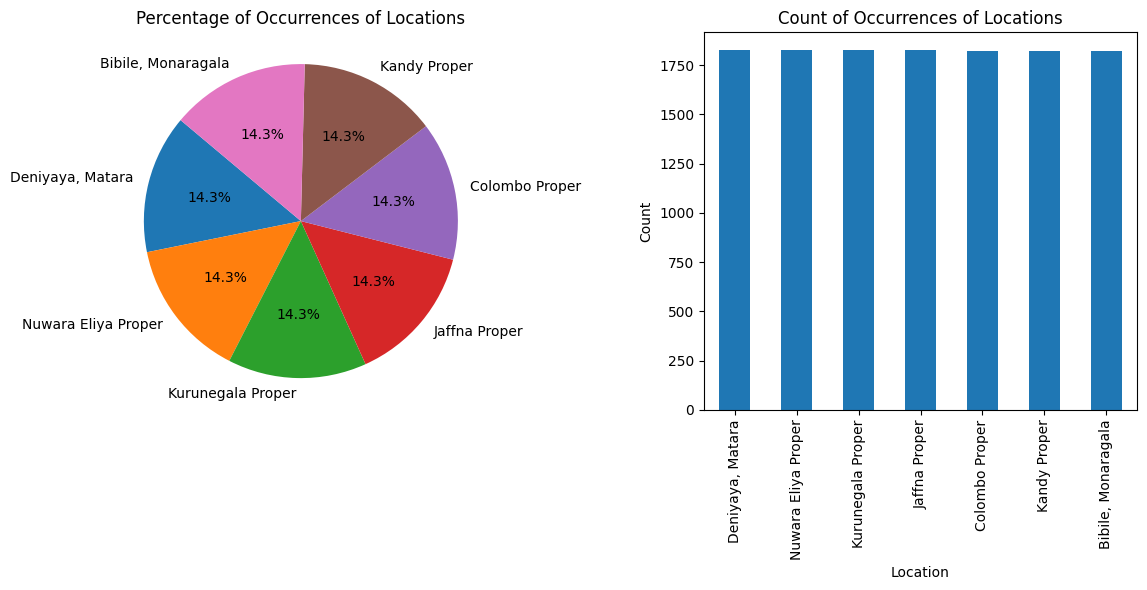

In [14]:
# Load  dataset
df = pd.read_csv(r'D:\DESKTOP\DE CW\Data_set_for_data_process.csv')

# Define the values to count
locations_to_count = ['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
                      'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper', 'Kandy Proper']

# Filter the dataframe to include only the specified locations
filtered_df = df[df['Location'].isin(locations_to_count)]

# Count occurrences of each location
location_counts = filtered_df['Location'].value_counts()

# Calculate percentages
percentages = (location_counts / location_counts.sum()) * 100

# Display counts
print("Location Counts:")
print(location_counts)
print()

# Plot pie chart
plt.figure(figsize=(12, 6))

# Subplot for pie chart
plt.subplot(1, 2, 1)
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Occurrences of Locations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Subplot for counts
plt.subplot(1, 2, 2)
location_counts.plot(kind='bar')
plt.title('Count of Occurrences of Locations')
plt.xlabel('Location')
plt.ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [3]:
import pandas as pd
# Load  dataset
New_data = pd.read_csv('D:\DESKTOP\DE CW\Data_set_for_data_process.csv')

import pandas as pd

# Define the locations to consider
locations_to_check = ['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
                      'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper', 'Kandy Proper']

# Function to count missing values for a specific location
def count_missing_values_by_location(df, location):
    location_df = df[df['Location'] == location]
    missing_values_count = location_df.isnull().sum().sum()
    return missing_values_count

# Display missing values count for each location in dataset A
print("Missing values count in Dataset :")
for location in locations_to_check:
    count = count_missing_values_by_location(New_data, location)
    print(f"{location}: {count}")



Missing values count in Dataset :
Colombo Proper: 487
Deniyaya, Matara: 847
Nuwara Eliya Proper: 1085
Bibile, Monaragala: 694
Kurunegala Proper: 592
Jaffna Proper: 365
Kandy Proper: 793


In [4]:
import pandas as pd

# Load the main dataset
main_df = pd.read_csv('D:\DESKTOP\DE CW\Data_set_for_data_process.csv')

# Define the locations
locations = ['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
             'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper', 'Kandy Proper']

# Create a dictionary to store sub-datasets
sub_datasets = {}

# Split the main dataset into sub-datasets based on locations
for location in locations:
    sub_datasets[location] = main_df[main_df['Location'] == location]

# Save each sub-dataset to a separate CSV file
for location, sub_df in sub_datasets.items():
    file_name = f"{location.replace(' ', '_').lower()}_dataset.csv"  # Generate file name
    sub_df.to_csv(file_name, index=False)
    print(f"Dataset for location '{location}' saved as '{file_name}'")

Dataset for location 'Colombo Proper' saved as 'colombo_proper_dataset.csv'
Dataset for location 'Deniyaya, Matara' saved as 'deniyaya,_matara_dataset.csv'
Dataset for location 'Nuwara Eliya Proper' saved as 'nuwara_eliya_proper_dataset.csv'
Dataset for location 'Bibile, Monaragala' saved as 'bibile,_monaragala_dataset.csv'
Dataset for location 'Kurunegala Proper' saved as 'kurunegala_proper_dataset.csv'
Dataset for location 'Jaffna Proper' saved as 'jaffna_proper_dataset.csv'
Dataset for location 'Kandy Proper' saved as 'kandy_proper_dataset.csv'


check 7 Locations data set missing values 

1.colombo

In [16]:
import pandas as pd

# Load  dataset
col = pd.read_csv('D:\DESKTOP\DE CW\colombo_proper_dataset.csv')

# Check for missing values
missing_values = col.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
HCHO Reading    487
Location          0
Current Date      0
Next Date         0
dtype: int64


In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
COLO = pd.read_csv('D:\DESKTOP\DE CW\colombo_proper_dataset.csv')

# Drop the "Location" column
COLO = COLO.drop(columns=['Location'])

# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}  # Dictionary to store label encoders for each column
for column in COLO.columns:
    if COLO[column].dtype == 'object':  # Check if the column contains non-numeric data
        label_encoders[column] = LabelEncoder()
        COLO[column] = label_encoders[column].fit_transform(COLO[column].astype(str))

# Split the dataset into features (X) and target (y)
X = COLO.dropna().drop(columns=['HCHO Reading'])  # Remove rows with missing values
y = COLO.dropna()['HCHO Reading']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
X_missing = COLO[COLO['HCHO Reading'].isnull()].drop(columns=['HCHO Reading'])
predicted_values = model.predict(X_missing)

# Fill in missing values with predicted values
COLO.loc[COLO['HCHO Reading'].isnull(), 'HCHO Reading'] = predicted_values

# Revert encoded values back to original values
for column, encoder in label_encoders.items():
    COLO[column] = encoder.inverse_transform(COLO[column])

# Add the "Location" column back
location_data = pd.read_csv('D:\DESKTOP\DE CW\colombo_proper_dataset.csv')
COLO['Location'] = location_data['Location']

#  save the modified dataset
COLO.to_csv('filled_dataset_1.csv', index=False)

2.deniyaya,_matara

In [6]:
import pandas as pd

# Load  dataset
deni = pd.read_csv('D:\DESKTOP\DE CW\deniyaya,_matara_dataset.csv')

# Check for missing values
missing_values = deni.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
HCHO Reading    847
Location          0
Current Date      0
Next Date         0
dtype: int64


In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
DENI = pd.read_csv('D:\DESKTOP\DE CW\deniyaya,_matara_dataset.csv')

# Drop the "Location" column
DENI = DENI.drop(columns=['Location'])

# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}  # Dictionary to store label encoders for each column
for column in DENI.columns:
    if DENI[column].dtype == 'object':  # Check if the column contains non-numeric data
        label_encoders[column] = LabelEncoder()
        DENI[column] = label_encoders[column].fit_transform(DENI[column].astype(str))

# Split the dataset into features (X) and target (y)
X = DENI.dropna().drop(columns=['HCHO Reading'])  # Remove rows with missing values
y = DENI.dropna()['HCHO Reading']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
X_missing = DENI[DENI['HCHO Reading'].isnull()].drop(columns=['HCHO Reading'])
predicted_values = model.predict(X_missing)

# Fill in missing values with predicted values
DENI.loc[DENI['HCHO Reading'].isnull(), 'HCHO Reading'] = predicted_values

# Revert encoded values back to original values
for column, encoder in label_encoders.items():
    DENI[column] = encoder.inverse_transform(DENI[column])

# Add the "Location" column back
location_data = pd.read_csv('D:\DESKTOP\DE CW\deniyaya,_matara_dataset.csv')
DENI['Location'] = location_data['Location']

#  save the modified dataset
DENI.to_csv('filled_dataset_2.csv', index=False)

3.nuwara_eliya

In [10]:
import pandas as pd

# Load  dataset
nuw = pd.read_csv('nuwara_eliya_proper_dataset.csv')

# Check for missing values
missing_values = nuw.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
HCHO Reading    1085
Location           0
Current Date       0
Next Date          0
dtype: int64


In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
ELIYA = pd.read_csv('nuwara_eliya_proper_dataset.csv')

# Drop the "Location" column
ELIYA = ELIYA.drop(columns=['Location'])

# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}  # Dictionary to store label encoders for each column
for column in ELIYA.columns:
    if ELIYA[column].dtype == 'object':  # Check if the column contains non-numeric data
        label_encoders[column] = LabelEncoder()
        ELIYA[column] = label_encoders[column].fit_transform(ELIYA[column].astype(str))

# Split the dataset into features (X) and target (y)
X = ELIYA.dropna().drop(columns=['HCHO Reading'])  # Remove rows with missing values
y = ELIYA.dropna()['HCHO Reading']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
X_missing = ELIYA[ELIYA['HCHO Reading'].isnull()].drop(columns=['HCHO Reading'])
predicted_values = model.predict(X_missing)

# Fill in missing values with predicted values
ELIYA.loc[ELIYA['HCHO Reading'].isnull(), 'HCHO Reading'] = predicted_values

# Revert encoded values back to original values
for column, encoder in label_encoders.items():
    ELIYA[column] = encoder.inverse_transform(ELIYA[column])

# Add the "Location" column back
location_data = pd.read_csv('nuwara_eliya_proper_dataset.csv')
ELIYA['Location'] = location_data['Location']

#  save the modified dataset
ELIYA.to_csv('filled_dataset_3.csv', index=False)

4.bibile,_monaragala

In [12]:
import pandas as pd

# Load  dataset
bibi = pd.read_csv('bibile,_monaragala_dataset.csv')

# Check for missing values
missing_values = bibi.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
HCHO Reading    694
Location          0
Current Date      0
Next Date         0
dtype: int64


In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
BIBILA = pd.read_csv('bibile,_monaragala_dataset.csv')

# Drop the "Location" column
BIBILA = BIBILA.drop(columns=['Location'])

# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}  # Dictionary to store label encoders for each column
for column in BIBILA.columns:
    if BIBILA[column].dtype == 'object':  # Check if the column contains non-numeric data
        label_encoders[column] = LabelEncoder()
        BIBILA[column] = label_encoders[column].fit_transform(BIBILA[column].astype(str))

# Split the dataset into features (X) and target (y)
X = BIBILA.dropna().drop(columns=['HCHO Reading'])  # Remove rows with missing values
y = BIBILA.dropna()['HCHO Reading']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
X_missing = BIBILA[BIBILA['HCHO Reading'].isnull()].drop(columns=['HCHO Reading'])
predicted_values = model.predict(X_missing)

# Fill in missing values with predicted values
BIBILA.loc[BIBILA['HCHO Reading'].isnull(), 'HCHO Reading'] = predicted_values

# Revert encoded values back to original values
for column, encoder in label_encoders.items():
    BIBILA[column] = encoder.inverse_transform(BIBILA[column])

# Add the "Location" column back
location_data = pd.read_csv('bibile,_monaragala_dataset.csv')
BIBILA['Location'] = location_data['Location']

#  save the modified dataset
BIBILA.to_csv('filled_dataset_4.csv', index=False)

5.kurunegala_proper

In [13]:
import pandas as pd

# Load  dataset
ku = pd.read_csv('D:\DESKTOP\DE CW\kurunegala_proper_dataset.csv')

# Check for missing values
missing_values = ku.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
HCHO Reading    592
Location          0
Current Date      0
Next Date         0
dtype: int64


In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
KURU = pd.read_csv('D:\DESKTOP\DE CW\kurunegala_proper_dataset.csv')

# Drop the "Location" column
KURU = KURU.drop(columns=['Location'])

# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}  # Dictionary to store label encoders for each column
for column in KURU.columns:
    if KURU[column].dtype == 'object':  # Check if the column contains non-numeric data
        label_encoders[column] = LabelEncoder()
        KURU[column] = label_encoders[column].fit_transform(KURU[column].astype(str))

# Split the dataset into features (X) and target (y)
X = KURU.dropna().drop(columns=['HCHO Reading'])  # Remove rows with missing values
y = KURU.dropna()['HCHO Reading']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
X_missing = KURU[KURU['HCHO Reading'].isnull()].drop(columns=['HCHO Reading'])
predicted_values = model.predict(X_missing)

# Fill in missing values with predicted values
KURU.loc[KURU['HCHO Reading'].isnull(), 'HCHO Reading'] = predicted_values

# Revert encoded values back to original values
for column, encoder in label_encoders.items():
    KURU[column] = encoder.inverse_transform(KURU[column])

# Add the "Location" column back
location_data = pd.read_csv('D:\DESKTOP\DE CW\kurunegala_proper_dataset.csv')
KURU['Location'] = location_data['Location']

#  save the modified dataset
KURU.to_csv('filled_dataset_5.csv', index=False)

6.jaffna_proper

In [14]:
import pandas as pd

# Load  dataset
jaff = pd.read_csv('D:\DESKTOP\DE CW\jaffna_proper_dataset.csv')

# Check for missing values
missing_values = jaff.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
HCHO Reading    365
Location          0
Current Date      0
Next Date         0
dtype: int64


In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
JAFF = pd.read_csv('D:\DESKTOP\DE CW\jaffna_proper_dataset.csv')

# Drop the "Location" column
JAFF = JAFF.drop(columns=['Location'])

# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}  # Dictionary to store label encoders for each column
for column in JAFF.columns:
    if JAFF[column].dtype == 'object':  # Check if the column contains non-numeric data
        label_encoders[column] = LabelEncoder()
        JAFF[column] = label_encoders[column].fit_transform(JAFF[column].astype(str))

# Split the dataset into features (X) and target (y)
X = JAFF.dropna().drop(columns=['HCHO Reading'])  # Remove rows with missing values
y = JAFF.dropna()['HCHO Reading']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
X_missing = JAFF[JAFF['HCHO Reading'].isnull()].drop(columns=['HCHO Reading'])
predicted_values = model.predict(X_missing)

# Fill in missing values with predicted values
JAFF.loc[JAFF['HCHO Reading'].isnull(), 'HCHO Reading'] = predicted_values

# Revert encoded values back to original values
for column, encoder in label_encoders.items():
    JAFF[column] = encoder.inverse_transform(JAFF[column])

# Add the "Location" column back
location_data = pd.read_csv('D:\DESKTOP\DE CW\jaffna_proper_dataset.csv')
JAFF['Location'] = location_data['Location']

#  save the modified dataset
JAFF.to_csv('filled_dataset_6.csv', index=False)


7.kandy_proper

In [15]:
import pandas as pd

# Load  dataset
kan = pd.read_csv('D:\DESKTOP\DE CW\kandy_proper_dataset.csv')

# Check for missing values
missing_values = kan.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
HCHO Reading    793
Location          0
Current Date      0
Next Date         0
dtype: int64


In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
KAND = pd.read_csv('D:\DESKTOP\DE CW\kandy_proper_dataset.csv')

# Drop the "Location" column
KAND = KAND.drop(columns=['Location'])

# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}  # Dictionary to store label encoders for each column
for column in KAND.columns:
    if KAND[column].dtype == 'object':  # Check if the column contains non-numeric data
        label_encoders[column] = LabelEncoder()
        KAND[column] = label_encoders[column].fit_transform(KAND[column].astype(str))

# Split the dataset into features (X) and target (y)
X = KAND.dropna().drop(columns=['HCHO Reading'])  # Remove rows with missing values
y = KAND.dropna()['HCHO Reading']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
X_missing = KAND[KAND['HCHO Reading'].isnull()].drop(columns=['HCHO Reading'])
predicted_values = model.predict(X_missing)

# Fill in missing values with predicted values
KAND.loc[KAND['HCHO Reading'].isnull(), 'HCHO Reading'] = predicted_values

# Revert encoded values back to original values
for column, encoder in label_encoders.items():
    KAND[column] = encoder.inverse_transform(KAND[column])

# Add the "Location" column back
location_data = pd.read_csv('D:\DESKTOP\DE CW\kandy_proper_dataset.csv')
KAND['Location'] = location_data['Location']

#  save the modified dataset
KAND.to_csv('filled_dataset_7.csv', index=False)


Last data set

In [29]:
import pandas as pd

# Load the 7 datasets
colombo_df = pd.read_csv('filled_dataset_1.csv')
deniyaya_df = pd.read_csv('filled_dataset_2.csv')
nuwara_eliya_df = pd.read_csv('filled_dataset_3.csv')
bibile_df = pd.read_csv('filled_dataset_4.csv')
kurunegala_df = pd.read_csv('filled_dataset_5.csv')
jaffna_df = pd.read_csv('filled_dataset_6.csv')
kandy_df = pd.read_csv('filled_dataset_7.csv')

# Add a 'Location' column to each dataset
colombo_df['Location'] = 'Colombo Proper'
deniyaya_df['Location'] = 'Deniyaya, Matara'
nuwara_eliya_df['Location'] = 'Nuwara Eliya Proper'
bibile_df['Location'] = 'Bibile, Monaragala'
kurunegala_df['Location'] = 'Kurunegala Proper'
jaffna_df['Location'] = 'Jaffna Proper'
kandy_df['Location'] = 'Kandy Proper'

# Concatenate the datasets vertically
final_dataset = pd.concat([colombo_df, deniyaya_df, nuwara_eliya_df,
                           bibile_df, kurunegala_df, jaffna_df, kandy_df], ignore_index=True)

# Optionally, you can save the final dataset
final_dataset.to_csv('final_dataset.csv', index=False)

In [30]:
import pandas as pd

# Load your dataset
last = pd.read_csv('final_dataset.csv')

# Check the count of unique values in the "Location" column
location_counts = last['Location'].value_counts()

# Print the count of each location
print(location_counts)

Location
Deniyaya, Matara       1826
Nuwara Eliya Proper    1826
Kurunegala Proper      1826
Jaffna Proper          1826
Colombo Proper         1825
Bibile, Monaragala     1825
Kandy Proper           1825
Name: count, dtype: int64


In [32]:


# Load your dataset
last = pd.read_csv('final_dataset.csv')

# Check for missing values
missing_values = last.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = last.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

Missing Values:
 HCHO Reading    0
Current Date    0
Next Date       0
Location        0
dtype: int64

Number of Duplicate Rows: 0


Remove unwanted Locations

In [33]:
# Load the dataset
data = pd.read_csv("final_dataset.csv")

# Filter out rows with specified location values
filtered_data = data[~data["Location"].isin(["Deniyaya, Matara", "Jaffna Proper", "Bibile, Monaragala", "Kandy Proper"])]

# Save the filtered dataset to a new CSV file
filtered_data.to_csv("final_Read_Process.csv", index=False)

In [34]:
# Load the dataset
data = pd.read_csv("final_Read_Process.csv")

# Display column names with their values
for column in data.columns:
    print(f"Column: {column}")
    print(data[column].unique())
    print()

Column: HCHO Reading
[2.62552217e-04 9.85211890e-05 2.09932052e-04 ... 1.22603179e-04
 1.57848076e-04 1.22578077e-04]

Column: Current Date
['2019-01-02' '2019-01-03' '2019-01-04' ... '2023-12-30' '2023-12-31'
 '2019-01-01']

Column: Next Date
['2019-01-03' '2019-01-04' '2019-01-05' ... '2023-12-31' '2024-01-01'
 '2019-01-02']

Column: Location
['Colombo Proper' 'Nuwara Eliya Proper' 'Kurunegala Proper']

